##About Dataset:
####The dataset contains information about a group of test subjects and their sleep patterns. Each test subject is identified by a unique "Subject ID" and their age and gender are also recorded. The "Bedtime" and "Wakeup time" features indicate when each subject goes to bed and wakes up each day, and the "Sleep duration" feature records the total amount of time each subject slept in hours. The "Sleep efficiency" feature is a measure of the proportion of time spent in bed that is actually spent asleep. The "REM sleep percentage", "Deep sleep percentage", and "Light sleep percentage" features indicate the amount of time each subject spent in each stage of sleep. The "Awakenings" feature records the number of times each subject wakes up during the night. Additionally, the dataset includes information about each subject's caffeine and alcohol consumption in the 24 hours prior to bedtime, their smoking status, and their exercise frequency.

##Summary:

-Goal of the project is to predict sleep efficiency with respective features

-Methods used : Linear Regression, Ridge Regression, Lasso Regression

-Performance of methods : Linear and Ridge Regression(alpha=0.08) performed pretty similar and Lasso could not perform well at all

-Verdict : Both Linear Regression and Ridge Regression can be used

##Importing Libraries

In [ ]:
# Everyday data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries, scaling, metrics, etc
from sklearn.preprocessing import StandardScaler

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load Dataset 

df = pd.read_csv('Sleep_Efficiency.csv')
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,70,10,3.0,0.0,0.0,No,3.0


##Data Preprocessing

In [ ]:
#Dropping ID column which is unnecessary
df = df.drop('ID',axis=1)

In [ ]:
#Converting categorical datas to numerical
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})

#Gender
df['Gender'] =df['Gender'].map({'Male':1,'Female':0})

In [ ]:
#Converting bedtime to Epoch

df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S')
df['Bedtime'] = df['Bedtime'].apply(lambda x: int(x.timestamp()))
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], format='%Y-%m-%d %H:%M:%S')
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: int(x.timestamp()))

In [ ]:
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,1614992400,1615014000,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0
1,69,1,1638669600,1638694800,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0
2,40,0,1621978200,1621920600,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,1635906600,1635928200,6.0,0.51,28,25,52,3.0,50.0,5.0,1,1.0
4,57,1,1615597200,1615626000,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0


In [ ]:
#Finding Null

print(df.isnull().sum())

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64


In [ ]:
# Imputing null values

df['Awakenings'].fillna(df['Awakenings'].min(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [ ]:
#checking duplicates
df.duplicated().sum()

0

###Visualizing Data

In [ ]:
#Splitting Feature and Target variables first

X = df.drop('Sleep efficiency',axis=1)
y = df['Sleep efficiency']

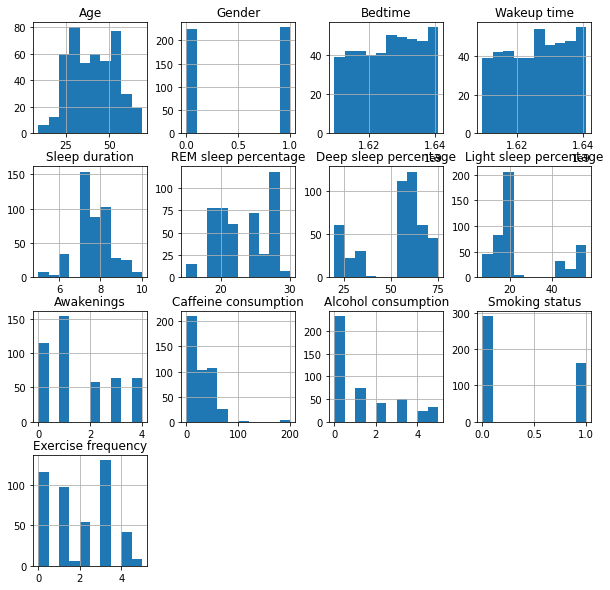

In [ ]:
#Visualizing in histogram

X.hist(figsize=(10,10))
plt.show()

###Removing Outliers

In [ ]:
# Calculate the IQR for each column in the dataframe
Q1 = df.quantile(0.25)

Q3 = df.quantile(0.75)

IQR = Q3 - Q1

# Print the shape of the dataframe before removing the outliers
print("The shape of the dataframe before removing the outliers is " + str(df.shape))

# Remove the outliers from the dataframe
df_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the shape of the dataframe after removing the outliers
print("The shape of the dataframe after removing the outliers is " + str(df_1.shape))

The shape of the dataframe before removing the outliers is (452, 14)
The shape of the dataframe after removing the outliers is (354, 14)


### Finding Correaltions

<Axes: >

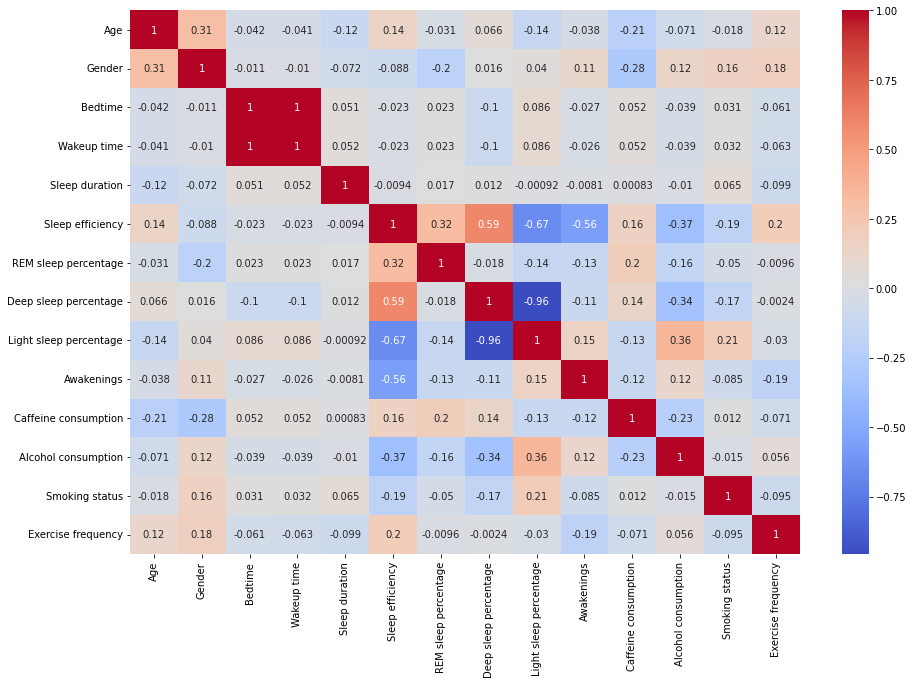

In [ ]:
corrmat = df_1.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corrmat, annot = True,cmap='coolwarm')

In [ ]:
#as deep sleep and light sleep has high negative correlation light sleep will be dropped

df_1 = df_1.drop('Light sleep percentage',axis=1)

In [ ]:
#dropping columns which has below 0.25 or upper than -0.25 correlation with sleep efficiency

df_1 = df_1.drop(['Smoking status','Caffeine consumption','Age','Gender','Bedtime','Wakeup time','Sleep duration','Exercise frequency'],axis=1)

In [ ]:
df_1.head()

,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Alcohol consumption
0,0.88,18,70,0.0,0.0
2,0.89,20,70,1.0,0.0
4,0.76,27,55,3.0,3.0
5,0.90,28,60,0.0,0.0
8,0.79,28,60,3.0,0.0


##Scaling Features

In [ ]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X = scaler_linear.fit_transform(X)

##Model Building

In [ ]:
#Training the model

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=50)

In [ ]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train)

# Use scikit-learn's utility function and divide by 2
train_mse = mean_squared_error(y_train, yhat) / 2
train_r2 = r2_score(y_train,yhat)

print(f"training MSE : {train_mse}")
print(f"training R2 :{train_r2}")

training MSE : 0.0016525033250737794
training R2 :0.8190913165653905


In [ ]:
yhat_test = linear_model.predict(X_test)

# Use scikit-learn's utility function and divide by 2
test_mse = mean_squared_error(y_test, yhat_test) / 2
test_r2 = r2_score(y_test,yhat_test)

print(f"Cross validation MSE: {test_mse}")
print(f"Cross validation R2 :{test_r2}")

Cross validation MSE: 0.0018126034369111241
Cross validation R2 :0.8004532062582226


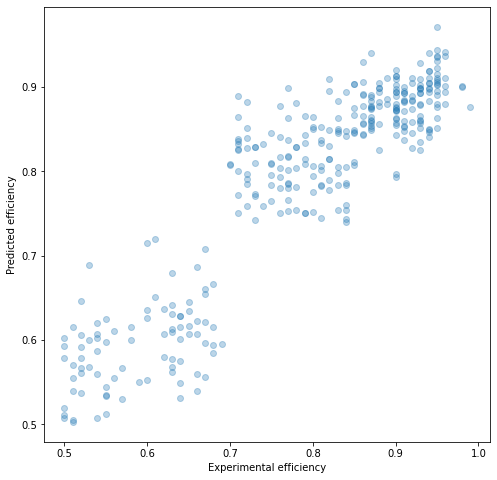

In [ ]:
#plotting experimental and predicted values for training data

plt.figure(figsize=(8,8))
plt.scatter(x= y_train,y = yhat, alpha = 0.3)
plt.ylabel('Predicted efficiency')
plt.xlabel('Experimental efficiency')


plt.show()

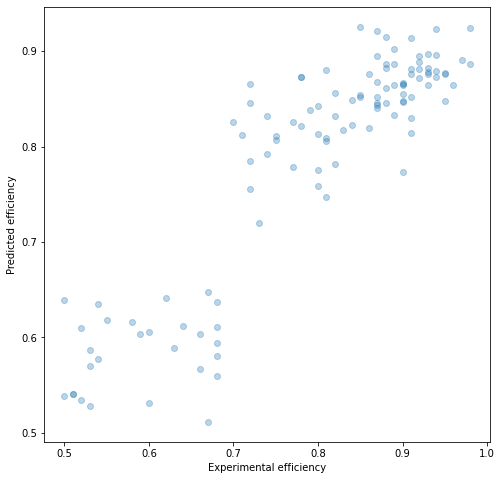

In [ ]:
#plotting experimental and predicted values for testing data

plt.figure(figsize=(8,8))
plt.scatter(x= y_test,y = yhat_test, alpha = 0.3)
plt.ylabel('Predicted efficiency')
plt.xlabel('Experimental efficiency')


plt.show()

In [ ]:
#Comparing scores in a dataframe

Final_Output = pd.DataFrame(['Linear Regression', train_mse, train_r2, test_mse, test_r2,]).transpose()
Final_Output.columns = ['Method', 'Training MSE', 'Training R2','Test MSE','Test R2']
Final_Output

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.001653,0.819091,0.001813,0.800453


##Model Comparison

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

models = [LinearRegression(),Ridge(),Lasso()]

def compare_models_train_test():
  for model in models:
    #training the model
    model.fit(X_train,y_train)
    #evaluating the model
    test_data_prediction = model.predict(X_test)
    accuracy = r2_score(y_test, test_data_prediction)
    mse = mean_squared_error(y_test,test_data_prediction) / 2
    
    print('R^2 score of the model', model, '=', accuracy)
    print('MSE score of the model', model, '=', mse)

compare_models_train_test()

R^2 score of the model LinearRegression() = 0.8004532062582226
MSE score of the model LinearRegression() = 0.0018126034369111241
R^2 score of the model Ridge() = 0.8019930611318716
MSE score of the model Ridge() = 0.0017986160097819646
R^2 score of the model Lasso() = -0.0015005797988589809
MSE score of the model Lasso() = 0.009097231576474272


###Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
import warnings;warnings.simplefilter('ignore')

####Linear Regression

In [ ]:
cv_score_lr = cross_val_score(LinearRegression(), X, y, cv=5)

In [ ]:
print(cv_score_lr)
print(f'The average cv score is {np.average(cv_score_lr)}')

[0.81303998 0.82433362 0.78158224 0.79165635 0.79940181]
The average cv score is 0.8020027990283687


####Ridge Regression

In [ ]:
lambdas = [0,0.01,0.02,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.5,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0]
avg_scores = {}
avg_score = {}
score = {}

for i in lambdas:
    cv_scores_rr = cross_val_score(Ridge(alpha = i),X, y, cv = 5)
    score[i] = cv_scores_rr
    avg_score[i] = np.average(cv_scores_rr)
    avg_scores[str(lambdas)] = np.average(cv_scores_rr)

print(score)
print(avg_score)

{0: array([0.81303998, 0.82433362, 0.78158224, 0.79165635, 0.79940181]), 0.01: array([0.8126048 , 0.82438351, 0.78188863, 0.79134196, 0.80228183]), 0.02: array([0.81255065, 0.8243696 , 0.78190141, 0.79129732, 0.80256413]), 0.05: array([0.81254474, 0.82435864, 0.781904  , 0.79125705, 0.80276983]), 0.06: array([0.81255375, 0.82435778, 0.78190333, 0.79125011, 0.80279736]), 0.07: array([0.81256446, 0.8243574 , 0.78190249, 0.79124421, 0.80281863]), 0.08: array([0.81257621, 0.82435733, 0.78190155, 0.79123897, 0.80283593]), 0.09: array([0.81258863, 0.82435747, 0.78190054, 0.79123419, 0.80285055]), 0.1: array([0.8126015 , 0.82435775, 0.78189949, 0.79122974, 0.80286325]), 0.11: array([0.81261468, 0.82435812, 0.78189841, 0.79122553, 0.80287456]), 0.12: array([0.81262806, 0.82435857, 0.78189731, 0.79122151, 0.80288479]), 0.13: array([0.81264158, 0.82435907, 0.78189619, 0.79121765, 0.8028942 ]), 0.14: array([0.81265519, 0.82435961, 0.78189506, 0.7912139 , 0.80290294]), 0.15: array([0.81266886, 0.8

In [ ]:
Ridge_df = pd.DataFrame.from_dict(score)
Ridge_df

,0.00,0.01,0.02,0.05,0.06,0.07,0.08,0.09,0.10,0.11,...,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00
0,0.813040,0.812605,0.812551,0.812545,0.812554,0.812564,0.812576,0.812589,0.812602,0.812615,...,0.817136,0.817302,0.817460,0.817611,0.817755,0.817893,0.818025,0.818151,0.818273,0.818389
1,0.824334,0.824384,0.824370,0.824359,0.824358,0.824357,0.824357,0.824357,0.824358,0.824358,...,0.822840,0.822670,0.822498,0.822325,0.822149,0.821971,0.821792,0.821611,0.821428,0.821244
2,0.781582,0.781889,0.781901,0.781904,0.781903,0.781902,0.781902,0.781901,0.781899,0.781898,...,0.781202,0.781162,0.781120,0.781077,0.781031,0.780983,0.780932,0.780879,0.780823,0.780765
3,0.791656,0.791342,0.791297,0.791257,0.791250,0.791244,0.791239,0.791234,0.791230,0.791226,...,0.789912,0.789839,0.789766,0.789691,0.789616,0.789539,0.789460,0.789380,0.789298,0.789215
4,0.799402,0.802282,0.802564,0.802770,0.802797,0.802819,0.802836,0.802851,0.802863,0.802875,...,0.804972,0.805090,0.805205,0.805317,0.805425,0.805529,0.805630,0.805728,0.805823,0.805913


In [ ]:
#average of respective lambdas for 5 validation sets
Ridge_df_avg = pd.DataFrame([avg_score])
Ridge_df_avg

,0.00,0.01,0.02,0.05,0.06,0.07,0.08,0.09,0.10,0.11,...,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00
0,0.802003,0.8025,0.802537,0.802567,0.802572,0.802577,0.802582,0.802586,0.80259,0.802594,...,0.803212,0.803213,0.80321,0.803204,0.803195,0.803183,0.803168,0.80315,0.803129,0.803105


In [ ]:
#Finding alpha for respective highest r2

dict1 = avg_score
a = [0]

for key,value in dict1.items():
    if value > a:
        a = value
        k = key

print(k,":",a)

13.0 : 0.8032128013764449
